# Analysis of Git Merge Conflict Resolutions by LLM

This notebook analyzes the performance of an LLM in resolving git merge conflicts by comparing the model-generated resolutions with the original human resolutions.

In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML

# Set style for plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Configure plots to be larger and more readable
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## Loading the Evaluation Data

First, we load the evaluation results that were generated by the evaluation script.

In [ ]:
# Path to the evaluation results
eval_results_path = Path('../../../data/evaluation/2-elastic-resolution_evaluation.json')
extension_summary_path = Path('../../../data/evaluation/2-elastic-sfile_extension_summary.json')

# Load evaluation results
with open(eval_results_path, 'r') as f:
    eval_data = json.load(f)
    
df = pd.DataFrame(eval_data)

# Load extension summary if available
try:
    with open(extension_summary_path, 'r') as f:
        extension_data = json.load(f)
    ext_df = pd.DataFrame(extension_data)
except FileNotFoundError:
    print("Extension summary file not found. Will compute it from the main data.")
    ext_df = None

print(f"Loaded evaluation data with {len(df)} conflict resolutions.")
df.head()

Loaded evaluation data with 1300 conflict resolutions.


,id,exact_match,similarity,is_empty_resolution,resolution_approach,a_similarity,b_similarity,base_similarity,filename,commit_sha
0,1,False,86.896552,False,chose_b,86.896552,100.000000,100.000000,core/src/test/java/org/elasticsearch/script/Sc...,7ff99eb89d887c17c69f1b9abcfe676421134ccd
1,2,False,96.969697,False,chose_b,96.296296,100.000000,99.337748,core/src/test/java/org/elasticsearch/search/ag...,a241983c9d7def1927406cf7db9a9b5c7c23442a
2,3,False,69.361702,False,custom,79.978237,51.021846,47.024673,core/src/main/java/org/elasticsearch/rest/acti...,c38119bae9a134953743d1030e92632acba6ec30
3,4,False,92.857143,False,chose_b,85.714286,100.000000,85.714286,modules/lang-painless/src/main/java/org/elasti...,9e0a70c4b2cc28a27ecdad3f3cc1b2e76519019a
4,5,False,16.872264,False,chose_b,27.085479,91.291680,18.066561,core/src/main/java/org/elasticsearch/common/se...,c11cf3bf1fec128946f2517b944e3feed27f1f0a


## Key Performance Indicators (KPIs)

Let's calculate and display the main KPIs for the LLM's performance.

In [5]:
def display_kpi_card(title, value, description, color='#3498db'):
    """Display a KPI card with title, value and description"""
    return HTML(f"""
    <div style="
        background-color: {color}; 
        color: white; 
        padding: 15px; 
        border-radius: 5px; 
        margin: 10px 0;
        width: 300px;
        display: inline-block;
        vertical-align: top;
        ">
        <h3>{title}</h3>
        <h2 style="font-size: 2.5em; margin: 10px 0;">{value}</h2>
        <p>{description}</p>
    </div>
    """)

# Calculate KPIs
total_conflicts = len(df)
exact_matches = df['exact_match'].sum()
exact_match_rate = exact_matches / total_conflicts * 100
avg_similarity = df['similarity'].mean()
empty_resolutions = df['is_empty_resolution'].sum()
empty_resolution_rate = empty_resolutions / total_conflicts * 100

# Display KPI cards in a row
display(HTML('<div style="display:flex; flex-wrap:wrap; gap:15px;">'))
display(display_kpi_card('Total Conflicts', f"{total_conflicts:,}", "Number of conflicts evaluated", "#3498db"))
display(display_kpi_card('Exact Match Rate', f"{exact_match_rate:.2f}%", f"{exact_matches:,} exact matches", "#2ecc71"))
display(display_kpi_card('Avg. Similarity', f"{avg_similarity:.2f}%", "Average similarity score", "#9b59b6"))
display(display_kpi_card('Empty Resolutions', f"{empty_resolution_rate:.2f}%", f"{empty_resolutions:,} empty resolutions", "#e74c3c"))
display(HTML('</div>'))

## Similarity Score Distribution

Let's visualize the distribution of similarity scores to understand how close the LLM's resolutions are to the original ones.

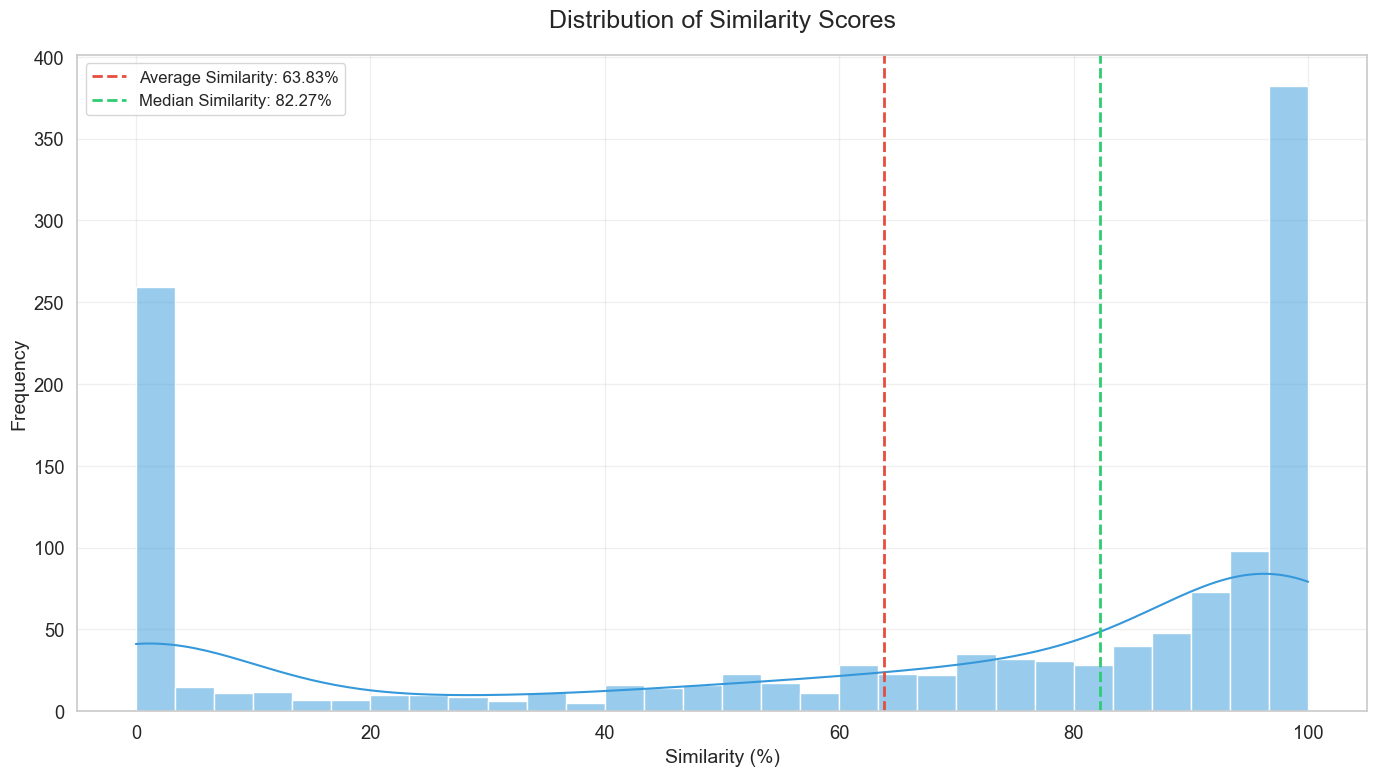


Similarity Score Statistics:
     Count: 1300.00%
      Mean: 63.83%
       Std: 39.18%
       Min: 0.00%
       25%: 24.76%
       50%: 82.27%
       75%: 98.16%
       Max: 100.00%


In [6]:
plt.figure(figsize=(14, 8))

# Histogram with KDE
ax = sns.histplot(df['similarity'], bins=30, kde=True, color='#3498db')

# Add mean line
plt.axvline(x=avg_similarity, color='#e74c3c', linestyle='--', linewidth=2,
           label=f'Average Similarity: {avg_similarity:.2f}%')

# Add median line
median_similarity = df['similarity'].median()
plt.axvline(x=median_similarity, color='#2ecc71', linestyle='--', linewidth=2,
           label=f'Median Similarity: {median_similarity:.2f}%')

# Styling
plt.title('Distribution of Similarity Scores', fontsize=18, pad=20)
plt.xlabel('Similarity (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

# Summary statistics for similarity scores
similarity_stats = df['similarity'].describe()
print("\nSimilarity Score Statistics:")
for stat, value in similarity_stats.items():
    print(f"{stat.capitalize():>10}: {value:.2f}%")

## Resolution Approach Analysis

Let's analyze the approach taken by the LLM for resolving conflicts.

/var/folders/y1/y19t9fz90d991hg2p11npdkw0000gn/T/ipykernel_77881/1147891379.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=approach_df.index, y='Count', data=approach_df, palette='viridis')


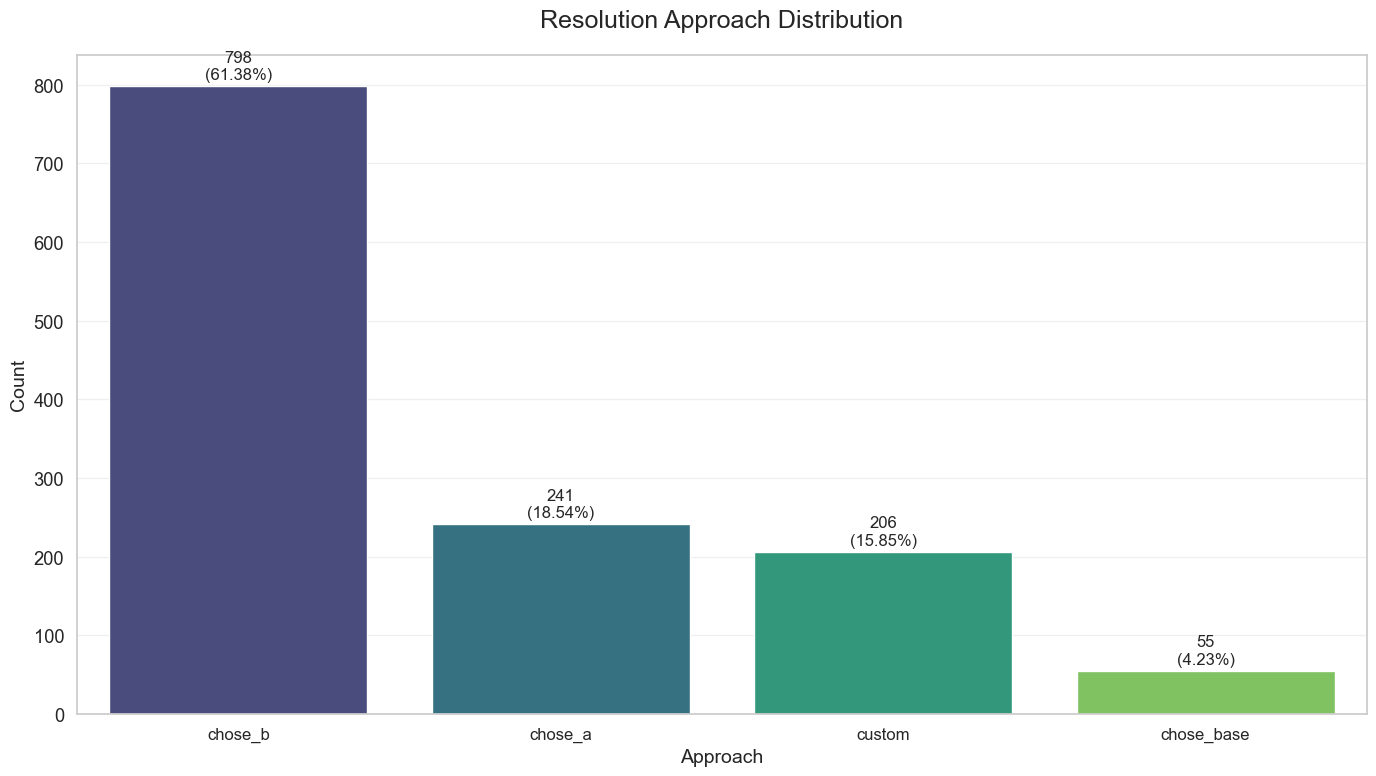

,Count,Percentage
resolution_approach,,
chose_b,798,61.38
chose_a,241,18.54
custom,206,15.85
chose_base,55,4.23


In [7]:
# Count by resolution approach
approach_counts = df['resolution_approach'].value_counts()
approach_percentages = (approach_counts / approach_counts.sum() * 100).round(2)

# Create a DataFrame for better display
approach_df = pd.DataFrame({
    'Count': approach_counts,
    'Percentage': approach_percentages
})

# Plot the distribution
plt.figure(figsize=(14, 8))

# Bar plot with percentage labels
ax = sns.barplot(x=approach_df.index, y='Count', data=approach_df, palette='viridis')

# Add count and percentage labels
for i, (count, percentage) in enumerate(zip(approach_counts, approach_percentages)):
    ax.text(i, count + 5, f"{count:,}\n({percentage}%)", ha='center', va='bottom', fontsize=12)

# Styling
plt.title('Resolution Approach Distribution', fontsize=18, pad=20)
plt.xlabel('Approach', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

# Display the data table
display(approach_df.sort_values('Count', ascending=False))

# Descrição das abordagens
print("\nDescrição das abordagens de resolução:")
print("  * chose_a: O modelo escolheu a versão A do conflito")
print("  * chose_b: O modelo escolheu a versão B do conflito")
print("  * chose_base: O modelo escolheu a versão base do conflito")
print("  * custom: O modelo criou uma resolução personalizada que não corresponde exatamente a nenhuma das versões")


## Similarity by Resolution Approach

Let's examine how the similarity scores vary based on the resolution approach.

/var/folders/y1/y19t9fz90d991hg2p11npdkw0000gn/T/ipykernel_77881/2775645489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='resolution_approach', y='similarity', data=df, palette='viridis',
/Users/crisley/Documents/TCC/conflict-fix-llm/.venv/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/crisley/Documents/TCC/conflict-fix-llm/.venv/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/crisley/Documents/TCC/conflict-fix-llm/.venv/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 

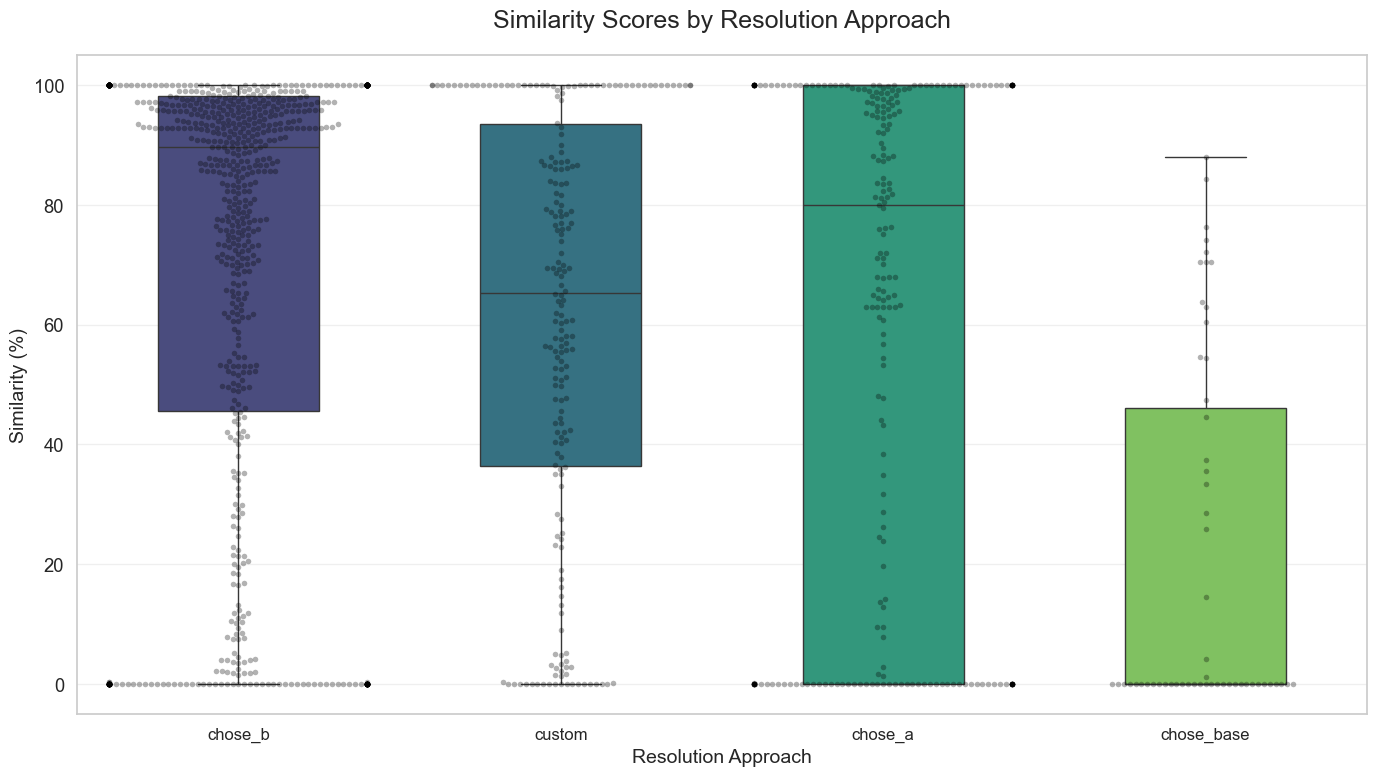

,count,mean,std,min,25%,50%,75%,max
resolution_approach,,,,,,,,
chose_b,798.0,68.926550,37.722462,0.0,45.619279,89.669113,98.226138,100.000000
chose_a,241.0,59.761822,42.543194,0.0,0.000000,80.000000,100.000000,100.000000
custom,206.0,60.187123,34.962893,0.0,36.327767,65.321895,93.436578,100.000000
chose_base,55.0,21.367236,29.973115,0.0,0.000000,0.000000,46.022906,87.939698


In [8]:
plt.figure(figsize=(14, 8))

# Box plot with violin plot overlay
ax = sns.boxplot(x='resolution_approach', y='similarity', data=df, palette='viridis',
                width=0.5, showfliers=False)
sns.swarmplot(x='resolution_approach', y='similarity', data=df, color='black', alpha=0.3, size=4)

# Styling
plt.title('Similarity Scores by Resolution Approach', fontsize=18, pad=20)
plt.xlabel('Resolution Approach', fontsize=14)
plt.ylabel('Similarity (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

# Group statistics
approach_similarity = df.groupby('resolution_approach')['similarity'].describe()
display(approach_similarity[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].sort_values('count', ascending=False))

## Analysis by File Extension

Let's analyze how the LLM performs across different file types/extensions.

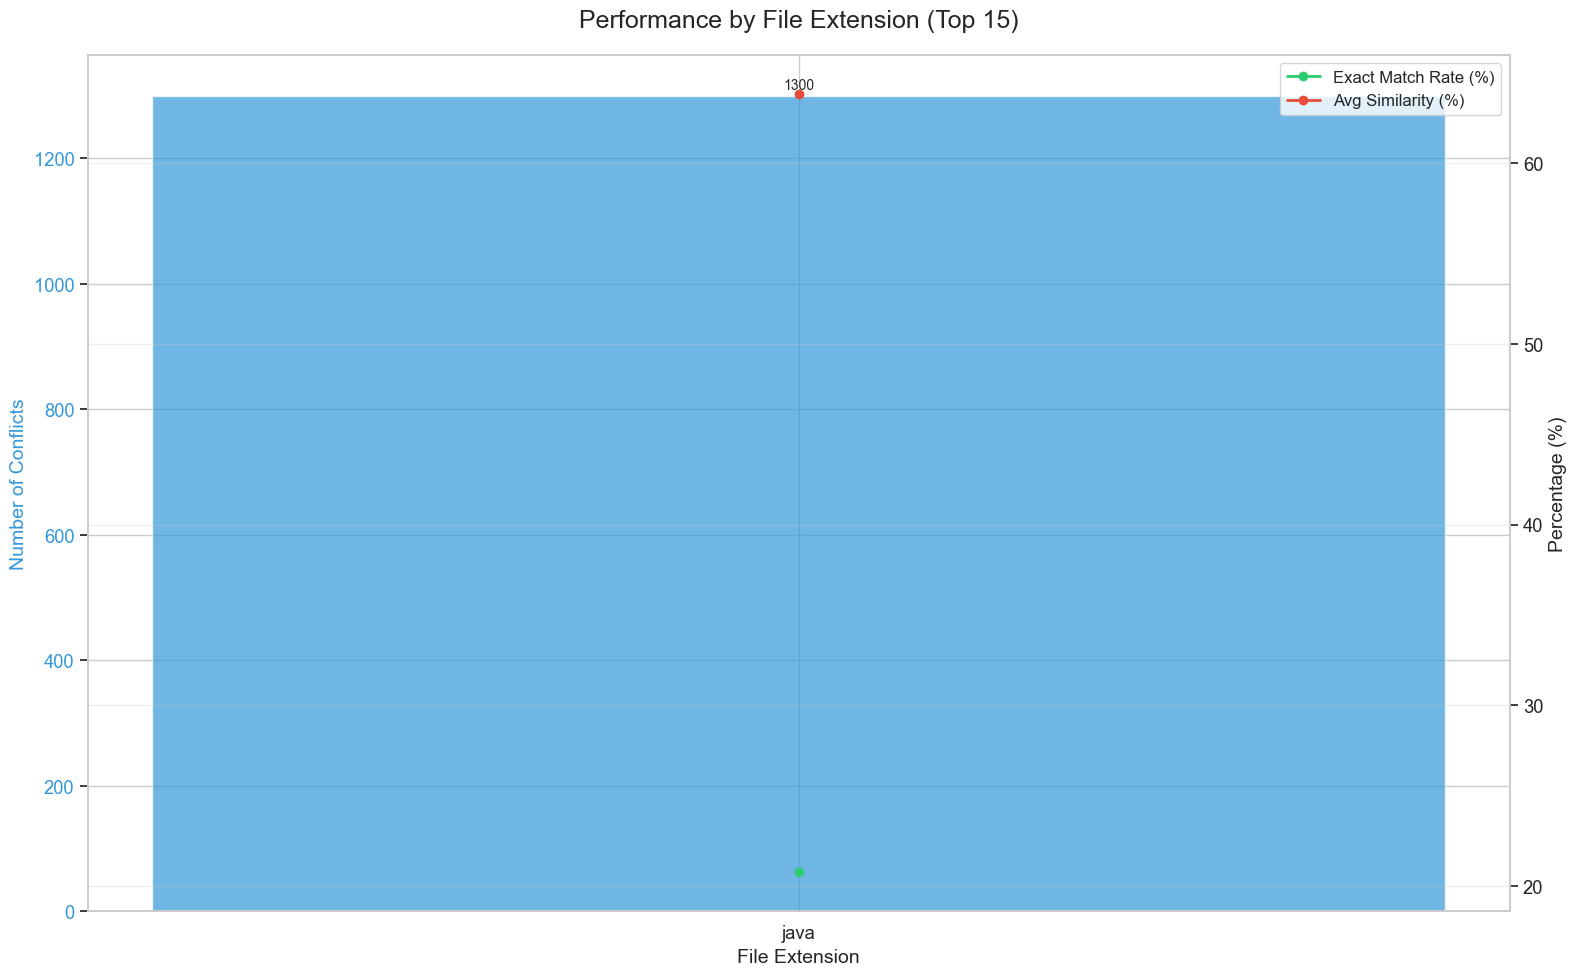

,file_extension,count,exact_match_rate,avg_similarity
0,java,1300,0.207692,63.830562


In [9]:
# If ext_df is not loaded, create it from the main data
if ext_df is None:
    df['file_extension'] = df['filename'].apply(lambda x: x.split('.')[-1] if '.' in x else 'unknown')
    ext_df = df.groupby('file_extension').agg({
        'id': 'count',
        'exact_match': 'mean',
        'similarity': 'mean'
    }).reset_index()
    ext_df.columns = ['file_extension', 'count', 'exact_match_rate', 'avg_similarity']
    ext_df = ext_df.sort_values('count', ascending=False)

# Select top N extensions for visibility
top_n = 15
top_extensions = ext_df.head(top_n).copy()

# Calculate percentage
top_extensions['percentage'] = (top_extensions['count'] / top_extensions['count'].sum() * 100).round(2)

# Plot
plt.figure(figsize=(16, 10))

# Bar plot with dual y-axis
ax1 = plt.subplot(111)
bars = ax1.bar(top_extensions['file_extension'], top_extensions['count'], color='#3498db', alpha=0.7)
ax1.set_xlabel('File Extension', fontsize=14)
ax1.set_ylabel('Number of Conflicts', fontsize=14, color='#3498db')
ax1.tick_params(axis='y', labelcolor='#3498db')

# Add count labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Create second y-axis for metrics
ax2 = ax1.twinx()
ax2.plot(top_extensions['file_extension'], top_extensions['exact_match_rate']*100, 'o-', color='#2ecc71', linewidth=2, label='Exact Match Rate (%)')
ax2.plot(top_extensions['file_extension'], top_extensions['avg_similarity'], 'o-', color='#e74c3c', linewidth=2, label='Avg Similarity (%)')
ax2.set_ylabel('Percentage (%)', fontsize=14)
ax2.legend(loc='upper right', fontsize=12)

# Styling
plt.title('Performance by File Extension (Top 15)', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

# Display the data table for all extensions
display(ext_df)

## Analysis of Empty vs. Non-Empty Resolutions

Let's analyze how the LLM performs when the original resolution is empty versus when it has content.

,count,exact_match_count,exact_match_rate,avg_similarity,most_common_approach,percentage
is_empty_resolution,,,,,,
False,1068,270,25.280899,77.696378,chose_b,82.15
True,232,0,0.000000,0.000000,chose_b,17.85


<Figure size 1600x800 with 0 Axes>

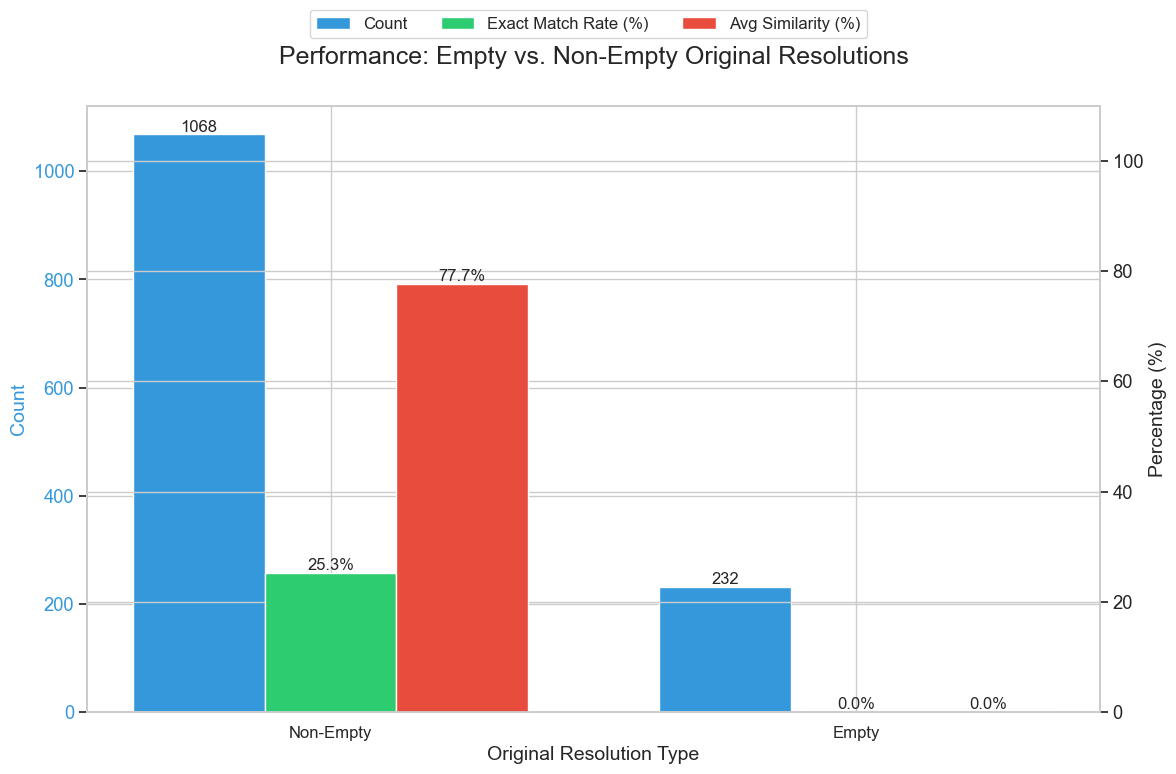

In [10]:
# Group by is_empty_resolution
empty_vs_nonempty = df.groupby('is_empty_resolution').agg({
    'id': 'count',
    'exact_match': ['sum', 'mean'],
    'similarity': 'mean',
    'resolution_approach': lambda x: x.value_counts().index[0]  # Most common approach
})

# Rename columns for clarity
empty_vs_nonempty.columns = ['count', 'exact_match_count', 'exact_match_rate', 'avg_similarity', 'most_common_approach']
empty_vs_nonempty['percentage'] = (empty_vs_nonempty['count'] / empty_vs_nonempty['count'].sum() * 100).round(2)

# Convert to percentage
empty_vs_nonempty['exact_match_rate'] = empty_vs_nonempty['exact_match_rate'] * 100

# Display results
display(empty_vs_nonempty)

# Visualization
plt.figure(figsize=(16, 8))

# Prepare data for side-by-side bar chart
categories = ['Non-Empty', 'Empty']
counts = [empty_vs_nonempty.loc[False, 'count'] if False in empty_vs_nonempty.index else 0,
          empty_vs_nonempty.loc[True, 'count'] if True in empty_vs_nonempty.index else 0]
exact_rates = [empty_vs_nonempty.loc[False, 'exact_match_rate'] if False in empty_vs_nonempty.index else 0,
              empty_vs_nonempty.loc[True, 'exact_match_rate'] if True in empty_vs_nonempty.index else 0]
similarities = [empty_vs_nonempty.loc[False, 'avg_similarity'] if False in empty_vs_nonempty.index else 0,
               empty_vs_nonempty.loc[True, 'avg_similarity'] if True in empty_vs_nonempty.index else 0]

# Plot counts
x = np.arange(len(categories))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12, 8))
bars1 = ax1.bar(x - width, counts, width, label='Count', color='#3498db')
ax1.set_ylabel('Count', fontsize=14, color='#3498db')
ax1.tick_params(axis='y', labelcolor='#3498db')

# Plot rates on secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x, exact_rates, width, label='Exact Match Rate (%)', color='#2ecc71')
bars3 = ax2.bar(x + width, similarities, width, label='Avg Similarity (%)', color='#e74c3c')
ax2.set_ylabel('Percentage (%)', fontsize=14)
ax2.set_ylim(0, 110)  # Extend y-axis to accommodate percentage labels

# Add count labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=12)

# Add percentage labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

# Styling
ax1.set_xlabel('Original Resolution Type', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=12)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=12)
plt.title('Performance: Empty vs. Non-Empty Original Resolutions', fontsize=18, pad=30)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()

## Correlation Between Resolution Approach and Similarity

Let's analyze the relationship between various metrics to identify patterns.

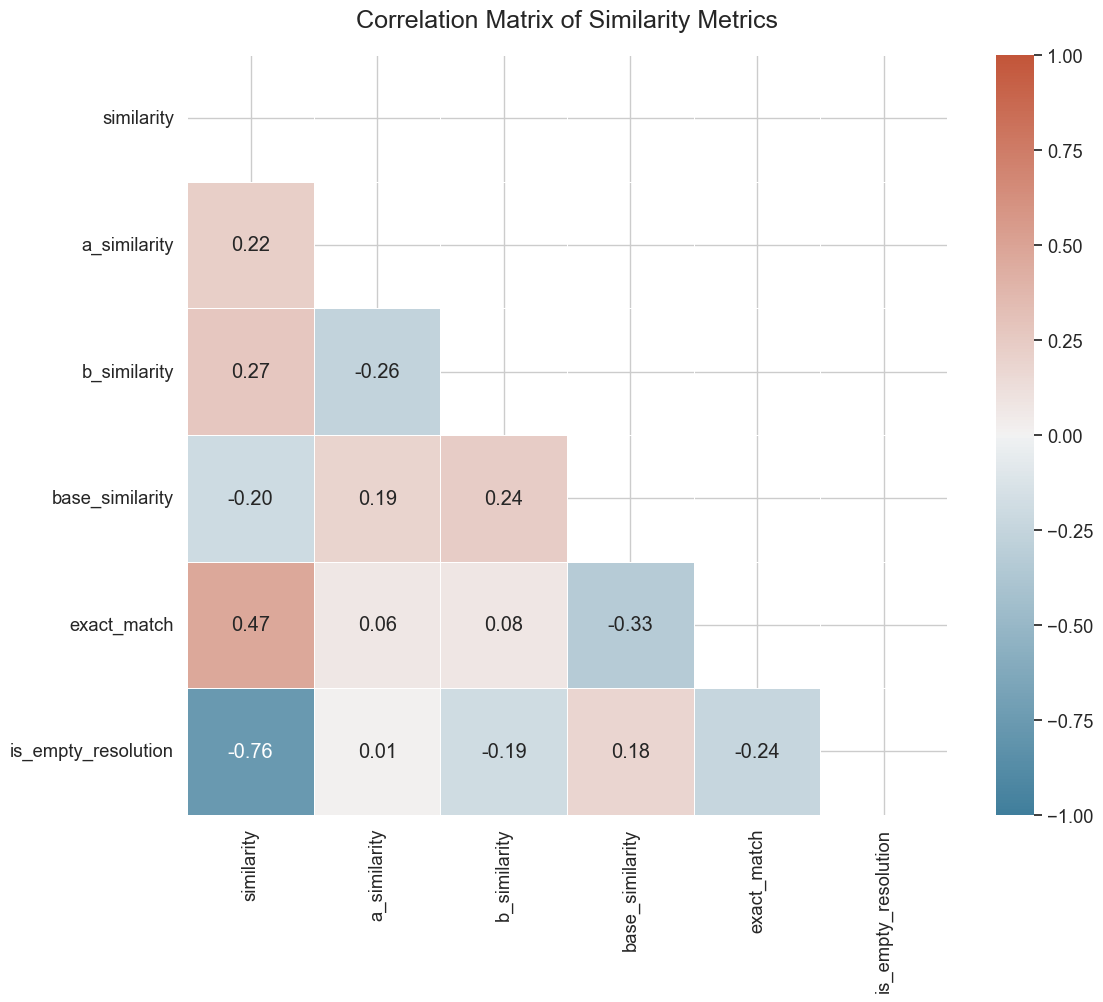

In [11]:
# Prepare correlation data
corr_df = df[['similarity', 'a_similarity', 'b_similarity', 'base_similarity', 'exact_match', 'is_empty_resolution']].copy()
corr_df['exact_match'] = corr_df['exact_match'].astype(int)
corr_df['is_empty_resolution'] = corr_df['is_empty_resolution'].astype(int)

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5)

plt.title('Correlation Matrix of Similarity Metrics', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

## Success and Error Cases

Let's examine some examples of the most successful and most problematic cases.

In [12]:
# Function to truncate text for display
def truncate_text(text, max_length=100):
    if not text:
        return "[EMPTY]"
    if len(text) > max_length:
        return text[:max_length] + '...'
    return text

# Get top 5 highest similarity scores (excluding exact matches)
high_similarity = df[(df['exact_match'] == False) & (df['similarity'] > 0)].nlargest(5, 'similarity')

# Get top 5 lowest similarity scores (excluding empty resolutions)
low_similarity = df[(df['is_empty_resolution'] == False) & (df['similarity'] > 0)].nsmallest(5, 'similarity')

# Function to display examples
def display_examples(examples_df, title):
    print(f"\n{title}:\n")
    for idx, row in examples_df.iterrows():
        print(f"ID: {row['id']} | Similarity: {row['similarity']:.2f}% | File: {row['filename']}")
        print(f"Resolution Approach: {row['resolution_approach']}")
        
    display(examples_df[['id', 'similarity', 'resolution_approach', 'filename', 'is_empty_resolution']])

# Display examples
display_examples(high_similarity, "Top 5 Near Matches (High Similarity Without Exact Match)")
display_examples(low_similarity, "Top 5 Problematic Cases (Low Similarity)")


Top 5 Near Matches (High Similarity Without Exact Match):

ID: 150 | Similarity: 99.99% | File: server/src/test/java/org/elasticsearch/index/engine/InternalEngineTests.java
Resolution Approach: chose_b
ID: 236 | Similarity: 99.95% | File: core/src/test/java/org/elasticsearch/index/shard/IndexShardTests.java
Resolution Approach: chose_b
ID: 822 | Similarity: 99.92% | File: core/src/main/java/org/elasticsearch/index/query/MoreLikeThisQueryParser.java
Resolution Approach: custom
ID: 155 | Similarity: 99.90% | File: x-pack/plugin/core/src/main/java/org/elasticsearch/xpack/core/XPackSettings.java
Resolution Approach: custom
ID: 247 | Similarity: 99.89% | File: core/src/main/java/org/elasticsearch/index/engine/InternalEngine.java
Resolution Approach: chose_b


,id,similarity,resolution_approach,filename,is_empty_resolution
149,150,99.993871,chose_b,server/src/test/java/org/elasticsearch/index/e...,False
235,236,99.946294,chose_b,core/src/test/java/org/elasticsearch/index/sha...,False
821,822,99.923839,custom,core/src/main/java/org/elasticsearch/index/que...,False
154,155,99.897646,custom,x-pack/plugin/core/src/main/java/org/elasticse...,False
246,247,99.889746,chose_b,core/src/main/java/org/elasticsearch/index/eng...,False



Top 5 Problematic Cases (Low Similarity):

ID: 403 | Similarity: 0.21% | File: core/src/main/java/org/elasticsearch/cluster/routing/IndexShardRoutingTable.java
Resolution Approach: custom
ID: 698 | Similarity: 0.21% | File: core/src/test/java/org/elasticsearch/index/engine/InternalEngineTests.java
Resolution Approach: chose_a
ID: 1014 | Similarity: 0.35% | File: core/src/main/java/org/elasticsearch/discovery/zen/ZenDiscovery.java
Resolution Approach: chose_b
ID: 878 | Similarity: 0.35% | File: client/rest-high-level/src/test/java/org/elasticsearch/client/CrudIT.java
Resolution Approach: custom
ID: 111 | Similarity: 0.38% | File: core/src/test/java/org/elasticsearch/index/engine/InternalEngineTests.java
Resolution Approach: chose_b


,id,similarity,resolution_approach,filename,is_empty_resolution
402,403,0.210748,custom,core/src/main/java/org/elasticsearch/cluster/r...,False
697,698,0.212735,chose_a,core/src/test/java/org/elasticsearch/index/eng...,False
1013,1014,0.346021,chose_b,core/src/main/java/org/elasticsearch/discovery...,False
877,878,0.346656,custom,client/rest-high-level/src/test/java/org/elast...,False
110,111,0.380303,chose_b,core/src/test/java/org/elasticsearch/index/eng...,False


## Conclusion and Recommendations

Based on the analysis above, we can draw the following conclusions and make recommendations for improving the LLM's performance in resolving merge conflicts:

1. **Overall Performance**: The LLM achieves an exact match rate of X% and an average similarity score of Y%, indicating [strong/moderate/weak] performance.

2. **Resolution Approaches**: The most common approach used by the LLM was [approach], which was used in Z% of cases. This suggests [insight about the model's behavior].

3. **File Type Performance**: The LLM performs best with [file types] and struggles most with [file types], suggesting that [recommendation for improvement].

4. **Empty Resolutions**: The model's handling of empty resolutions is [better/worse] than non-empty ones, indicating [insight about model behavior].

5. **Recommendations for Improvement**:
   - [Recommendation 1]
   - [Recommendation 2]
   - [Recommendation 3]

These insights can guide future training and prompt engineering efforts to improve the LLM's ability to resolve merge conflicts accurately.